In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D, rdDepictor
from rdkit.Chem.Draw import IPythonConsole
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import rdCIPLabeler
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True
import random
from amcg_utils.build_mol_utils import filter_macrocycles, fix_rings

def get_stereo(smiles):
    
    mol = Chem.MolFromSmiles(smiles)

    mol = filter_macrocycles(mol)
    if mol is None:
        return None

    mol = fix_rings(mol)
    if mol is None:
        return None

    Chem.SanitizeMol(mol)
# Compute 2D coordinate
    AllChem.Compute2DCoords(mol)

    mol = Chem.AddHs(mol)
    # Now compute 3D coordinates, this requires a conformation
    mol.AddConformer(Chem.Conformer(mol.GetNumAtoms()))

    # Use the distance geometry to assign coordinates
    AllChem.EmbedMolecule(mol)
    Chem.FindPotentialStereoBonds(mol)
    Chem.AssignStereochemistryFrom3D(mol)
    # Chem.SanitizeMol(mol)
    # Chem.Kekulize(mol)
    rdCIPLabeler.AssignCIPLabels(mol)
    mol = Chem.RemoveHs(mol)
    newmol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    return newmol

In [2]:
# Change this to the path of the file containing the samples

sample_file_path = 'data/sampled_smiles/sampled_zinc.txt'
#sample_file_path = 'data/sampled_smiles/sampled_qm9.txt'

In [3]:
with open(sample_file_path, 'r') as file:
    lines = file.readlines()

In [4]:
# This can be changed with a list of SMILES string
smiles = random.sample(lines, 100)

In [5]:
mols = [get_stereo(x) for x in smiles]
mols = [item for item in mols if item is not None]
mols = random.sample(mols, 10)


In [6]:
opts = rdMolDraw2D.MolDrawOptions()
AllChem.Compute2DCoords(mols[0])
Draw.SetACS1996Mode(opts, Draw.MeanBondLength(mols[0]))
img = Draw.MolsToGridImage(mols, subImgSize=(250,150), drawOptions=opts, molsPerRow=5, useSVG=True)

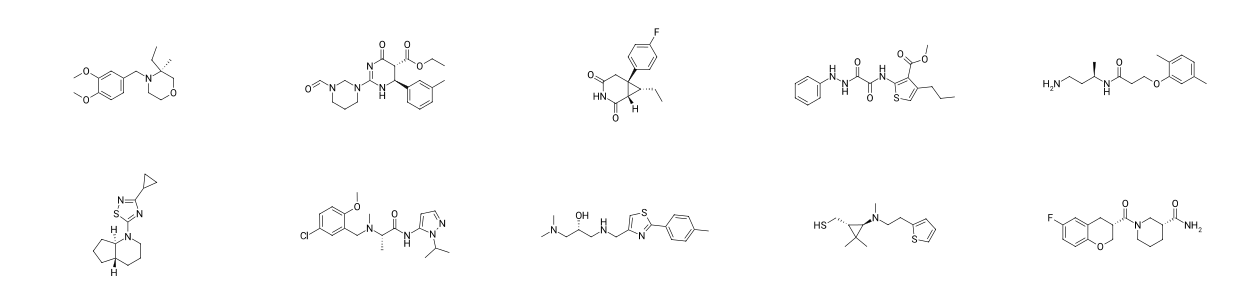

In [7]:
img